# Used Car Data Exploration
## by (Oluwasegun Olujemibola) 

## Introduction
This dataset contains different types of used cars and their features. The dataset was gathered from kaggle's datasets;[Used Car Data](https://www.kaggle.com/datasets/shubham1kumar/usedcar-data). The aim of the analysis is to find features are significant to predicting the prices of the cars.

## Data Wrangling

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline
base_color = sns.color_palette()[0]

In [2]:
# load dataset
car_df = pd.read_csv('datasets/UserCarData.csv')

In [3]:
car_df.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


In [4]:
car_df.shape

(7901, 18)

### Data Cleaning

In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7901 entries, 0 to 7900
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           7901 non-null   int64  
 1   name               7901 non-null   object 
 2   year               7901 non-null   int64  
 3   selling_price      7901 non-null   int64  
 4   km_driven          7901 non-null   int64  
 5   Region             7901 non-null   object 
 6   State or Province  7901 non-null   object 
 7   City               7901 non-null   object 
 8   fuel               7901 non-null   object 
 9   seller_type        7901 non-null   object 
 10  transmission       7901 non-null   object 
 11  owner              7901 non-null   object 
 12  mileage            7901 non-null   float64
 13  engine             7901 non-null   int64  
 14  max_power          7901 non-null   float64
 15  torque             7901 non-null   object 
 16  seats              7901 

In [6]:
car_df.duplicated().sum()

0

From the inspection, the dataset is tidy, and it has enough quality to continue with the analysis.

### What is the structure of your dataset?
The dataset contains 7901 used cars with 18 features

### Data description. 
The following contains a brief description of the features considered in the analysis
- name: Name of the used car
- year:Year of the car purchase
- selling_price:Current sellling price for used car
- km_driven:Total km driven
- Region:Region where it is used
- State or Province:State or Province where it is used
- City:City where it is used
- fuel:Fuel type
- seller_type:Who is selling the car
- transmission:Transmission type of the car
- owner:Owner type
- mileage:Mileage of the car
- engine:engine power
- max_power:max power
- seats:Number of seats
- sold: used car sold or not


### What is/are the main feature(s) of interest in your dataset?

> I'm  interested in figuring out what features are best for predicting the price of the used cars in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I'm not sure what to expect from the dataset,but, I think the quantitative variables should have more significance in predicting price compared to the qualitative variables

### Exploratory Data Analysis

Summary statistics of the quantitative variables in the datasets

In [7]:
car_df.describe()

,Sales_ID,year,selling_price,km_driven,mileage,engine,max_power,seats
count,7901.000000,7901.000000,7.901000e+03,7.901000e+03,7901.000000,7901.000000,7901.000000,7901.000000
mean,4069.459436,2013.980762,6.474381e+05,6.922319e+04,19.421449,1458.531958,91.542652,5.416656
std,2346.321903,3.862856,8.063619e+05,5.679331e+04,4.036465,503.994359,35.704798,0.959454
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2036.000000,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,4074.000000,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,6103.000000,2017.000000,6.900000e+05,9.600000e+04,22.320000,1582.000000,102.000000,5.000000
max,8128.000000,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


### Univariate Exploration

1. First, I'll observe the distribution of the selling price

(array([7.098e+03, 4.500e+02, 1.270e+02, 9.900e+01, 1.300e+01, 1.120e+02,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([   29999. ,  1026999.1,  2023999.2,  3020999.3,  4017999.4,
         5014999.5,  6011999.6,  7008999.7,  8005999.8,  9002999.9,
        10000000. ]),
 <BarContainer object of 10 artists>)

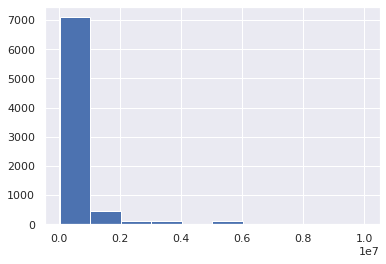

In [8]:
# plotting price distribution
plt.hist(x='selling_price',data=car_df)

The price distribution has a wide range. A log scale will probably put things in perspective

In [9]:
def log_trans(x,inverse=False):
    """converts to log10 base if inverse is false and vice versa"""
    if inverse:
        return (10 ** x).astype(int)
    else:
        return np.log10(x)

Text(0.5, 1.0, 'Distribution of price of used cars')

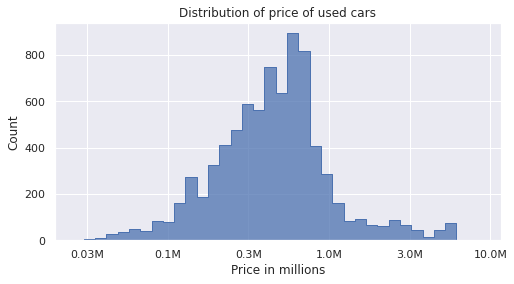

In [10]:
# applying log scale transformation
selling_price=log_trans(car_df.selling_price)
bins = np.arange(4.2,7.0,0.07)
selling_price=log_trans(car_df.selling_price)
plt.figure(figsize=[8,4])
sns.histplot(x=selling_price,bins=bins,element='step');
x_ticks = np.array([3.0,4.5,5.0,5.5,6.0,6.5,7.0])
ticks = [10000,30000,100000,300000,1000000,3000000,10000000]
labels = [str(t/1000000)+"M" for t in ticks]
plt.xticks(x_ticks,labels);
plt.xlim(4.3)
plt.xlabel('Price in millions')
plt.ylabel('Count')
plt.title('Distribution of price of used cars')

When plotted with a standard scale a lot of the data points are clusterd to the left.This seems to be as a result of very large prices in the datasets.After performing a log transformation, the distribution of price seems fairly normal with some skew on the right. The mean and median price is apporximately 600,000 and 400,000 respectively. The contains few high values,the highest price is 10 million owned by a single car. Less than 9% of car prices are above
1 million. Most car prices are between 200,000 and 600,000

2. Next is the km_driven variable. I'll observe it's distribution

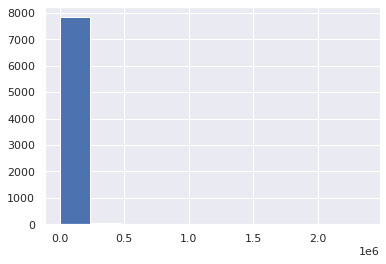

In [11]:
# plotting km_driven on a standard scale
plt.hist('km_driven',data=car_df);

Like the price variable I will apply log transformation to the km_driven variable. It is impossible to read because of it's wide range of values

In [12]:
np.log10(car_df.km_driven.describe())


count    3.897682
mean     4.840252
std      4.754297
min      0.000000
25%      4.544068
50%      4.778151
75%      4.982271
max      6.372996
Name: km_driven, dtype: float64

Text(0.5, 1.0, 'Distribition of km_driven')

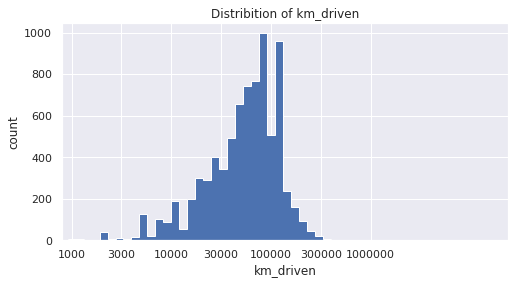

In [13]:
km_driven = log_trans(car_df.km_driven)
bins = np.arange(0,6.4+0.01,0.08)
plt.figure(figsize=[8,4])
plt.hist(x=km_driven,bins=bins,histtype='stepfilled');
plt.xlim((2.9,7.38))
ticks = np.array([3.0,3.5,4.0,4.5,5.0,5.5,6.0])
labels =[1000,3000,10000,30000,100000,300000,1000000]
plt.xticks(ticks,labels);
plt.xlabel('km_driven')
plt.ylabel('count')
plt.title('Distribition of km_driven')

Most of the cars in the dataset has driven, on an average,between 30,000km and 100,000km

3.The next variable is the max_power feature.I'll observe it's distribution 

Text(0.5, 1.0, 'Distribution of max_power')

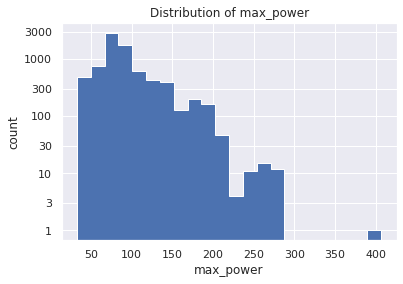

In [14]:
bins = np.arange(car_df.max_power.min(),car_df.max_power.max()+10,17)
plt.hist('max_power',data=car_df,bins=bins,histtype='stepfilled')
plt.yscale('log')
ticks = [1,3,10,30,100,300,1000,3000]
labels = [str(t) for t in ticks]
plt.yticks(ticks,labels);
plt.ylabel('count')
plt.xlabel('max_power')
plt.title('Distribution of max_power')

The plot above shows that several cars have maximum power between 50 and 280. The mode falls between 50 and 100 max_power. We can also observe the a single car having 400 as it's max power

In [15]:
# car(s) with greater than/equal to 400 max_power  
car_df.loc[(car_df.max_power >= 400)]

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
164,171,Volvo,2017,10000000,30000,East,New York,New York City,Petrol,Individual,Automatic,First_Owner,42.0,1969,400.0,640Nm@ 1740rpm,4,Y


Now unto the transmission variable

Text(0.5, 1.0, 'Transmission types ')

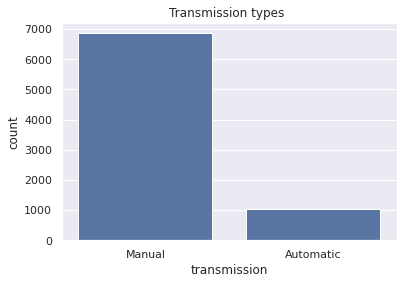

In [16]:
# 
sns.countplot(x='transmission',data=car_df,color=base_color)
plt.title('Transmission types ')

From this plot, we can observe that manual transmission cars are several times more than automatic cars

 Next is the fuel type distribution

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

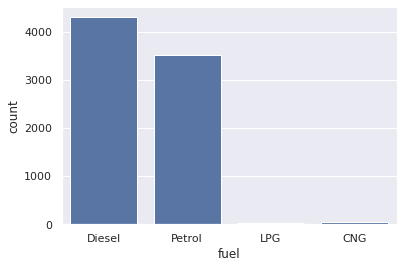

In [17]:
sns.countplot(x='fuel',data=car_df,color=base_color)
car_df.fuel.unique()

It will be better to see the percentages instead of count.It will provide more insight

Text(0.5, 1.0, 'Fuel types')

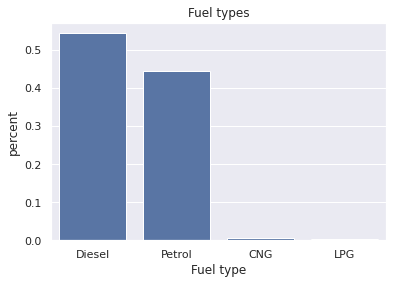

In [18]:
fuel = car_df.fuel.value_counts(normalize=True)
sns.barplot(x=fuel.index,y=fuel,color=base_color)
plt.xlabel('Fuel type')
plt.ylabel('percent')
plt.title('Fuel types')

Diesel and petrol are the most common fuel type with CNG and LPG having less than 1%

Next we'll check the seller_type feature

Text(0.5, 1.0, 'Proportion of fuel type')

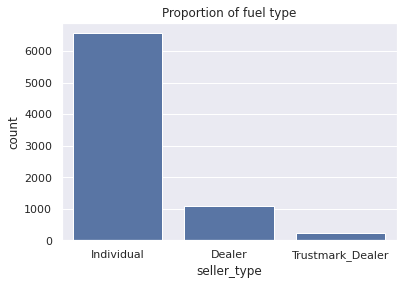

In [19]:
sns.countplot(x='seller_type',data=car_df,color=base_color)
plt.title('Proportion of fuel type')

Individuals are the highest sellers of used cars,folllowed by Dealers and Trusmark Dealers

Next,we'll check how many owners the car has had before the current buyer

Text(0.5, 1.0, 'No of previous owners')

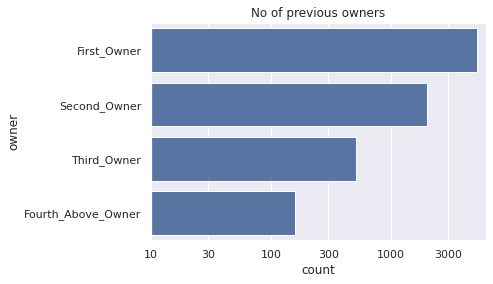

In [20]:
sns.countplot(y='owner',data=car_df,color=base_color,)
plt.xscale('log')
ticks=[10,30,100,300,1000,3000]
label=[str(t) for t in ticks]
plt.xticks(ticks,label);
plt.title('No of previous owners')

Most of the used cars have only had one owner.

Next we'll check how the number of seats is distributed

Text(0.5, 1.0, 'No of seats distribution')

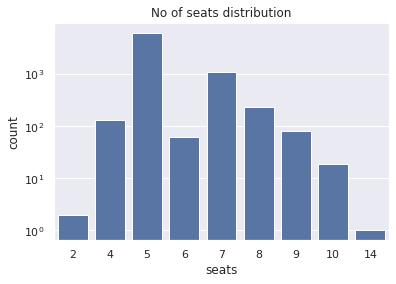

In [21]:
sns.countplot(x='seats',data=car_df,color=base_color)
plt.yscale('log')
plt.title('No of seats distribution')

The most common number of seats is 5 

<AxesSubplot:xlabel='sold', ylabel='count'>

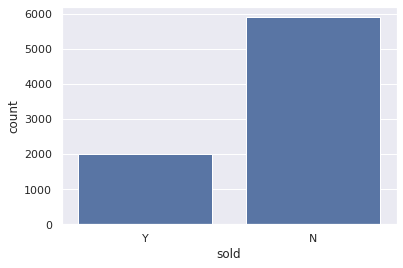

In [22]:
sns.countplot(x='sold',data=car_df,color=base_color)

Text(0.5, 1.0, 'Percent of used cars sold and not sold')

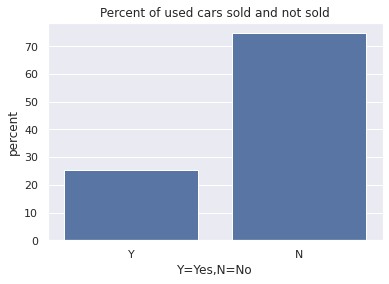

In [23]:
# let's compare percentages instead
sold = car_df.sold.value_counts(normalize=True)*100
sns.barplot(x=sold.index,y=sold,order=['Y','N'],color=base_color)
plt.xlabel('Y=Yes,N=No')
plt.ylabel('percent')
plt.title('Percent of used cars sold and not sold')

It's shocking to find most of the cars were not sold.Less than 30% sold! <br>

### Birvariate Exploration

As a result of the discovery made in the last visualization,I would check to find any differences between cars that were sold and those not sold.<br>

Now, we'll observe the price distribution of cars that were sold and those that were not

Text(0.5, 1.0, 'Distribution of price of used cars')

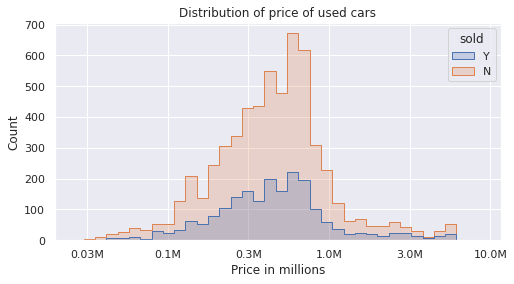

In [24]:
# applying log scale transformation
selling_price=log_trans(car_df.selling_price)
bins = np.arange(4.2,7.0,0.07)
selling_price=log_trans(car_df.selling_price)
plt.figure(figsize=[8,4])
sns.histplot(x=selling_price,bins=bins,hue=car_df.sold,element='step');
x_ticks = np.array([3.0,4.5,5.0,5.5,6.0,6.5,7.0])
ticks = [10000,30000,100000,300000,1000000,3000000,10000000]
labels = [str(t/1000000)+"M" for t in ticks]
plt.xticks(x_ticks,labels);
plt.xlim(4.3)
plt.xlabel('Price in millions')
plt.ylabel('Count')
plt.title('Distribution of price of used cars')

Suprisingly,the price distribution is the same for sold cars and cars that were not sold. Does this mean that price did not influence the pruchase of a car?

Next,I'll check the km_driven variable

Text(0.5, 1.0, 'Distribition of km_driven')

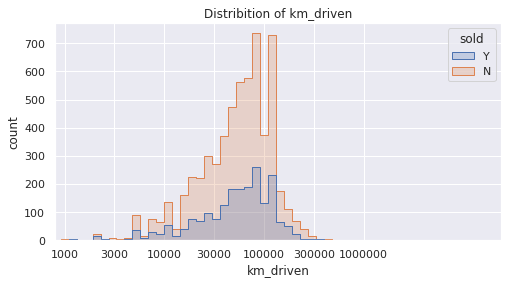

In [25]:
km_driven = log_trans(car_df.km_driven)
bins = np.arange(0,6.4+0.01,0.08)
plt.figure(figsize=[8,4])
sns.histplot(x=km_driven,bins=bins,hue=car_df.sold,element='step');
plt.xlim((2.9,7.38))
ticks = np.array([3.0,3.5,4.0,4.5,5.0,5.5,6.0])
labels =[1000,3000,10000,30000,100000,300000,1000000]
plt.xticks(ticks,labels);
plt.xlabel('km_driven')
plt.ylabel('count')
plt.title('Distribition of km_driven')

Same result for km_driven, the distribution remains the same.

Next;the max_power variable

Text(0.5, 1.0, 'Distribution of max_power')

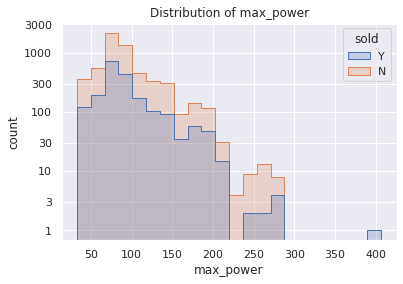

In [26]:
bins = np.arange(car_df.max_power.min(),car_df.max_power.max()+10,17)
sns.histplot(x='max_power',data=car_df,bins=bins,hue='sold',element='step')
plt.yscale('log')
ticks = [1,3,10,30,100,300,1000,3000]
labels = [str(t) for t in ticks]
plt.yticks(ticks,labels);
plt.ylabel('count')
plt.xlabel('max_power')
plt.title('Distribution of max_power')

The data distribution is fairly similar for max_power

Now, I'll check how sold cars and cars that were not sold compares to the categorical variables

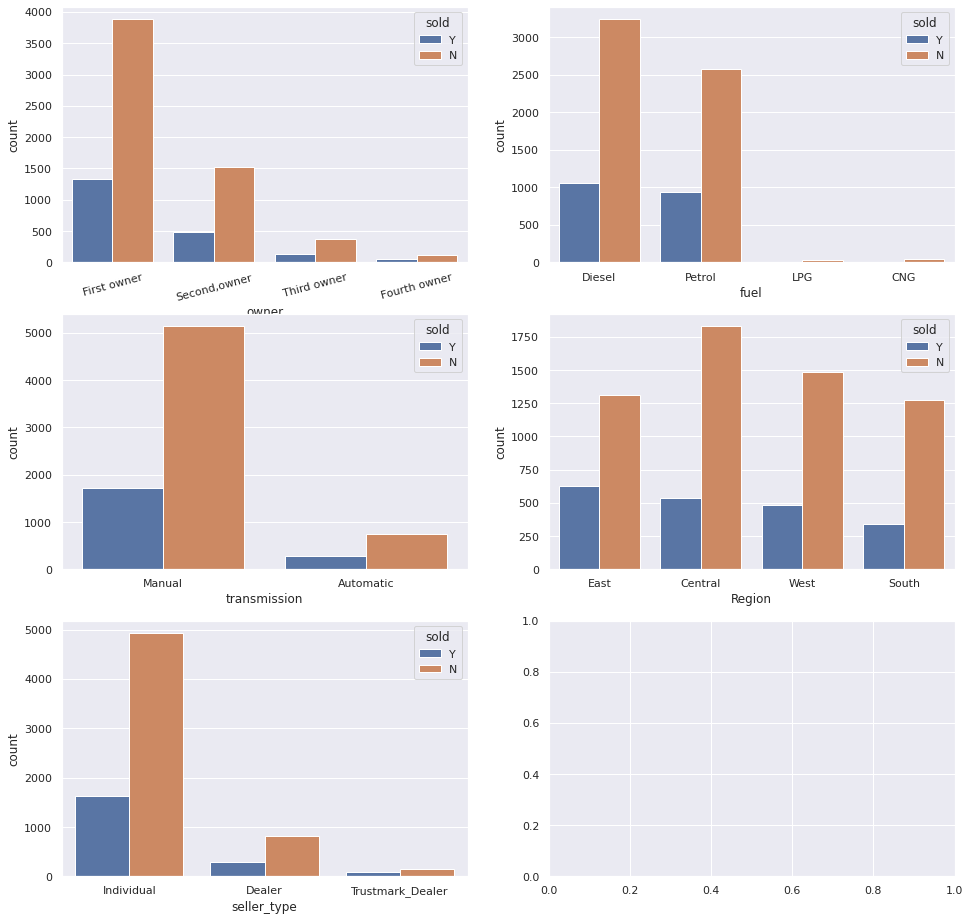

In [27]:
categorical_variables = ['owner','fuel','transmission','Region','seller_type']
fig,axs = plt.subplots(3,2)
fig.set_figheight(16)
fig.set_figwidth(16)
axes = axs[0,0],axs[0,1],axs[1,0],axs[1,1],axs[2,0]
index = 0
for var in categorical_variables:
    g = sns.countplot(x=var,data=car_df,hue='sold',ax=axes[index])
    if var == 'owner':
        g.set_xticklabels(['First owner','Second,owner','Third owner','Fourth owner'],rotation=15)
    index +=1
    
    


After checking all the variables in the dataset, I can say that none of them determines if a car will be pruchased or not

Next, I'll look at the correlation among the quantiative variables using a heat map

In [28]:
num_vars = ['selling_price','km_driven','mileage','engine','max_power','seats']

<AxesSubplot:>

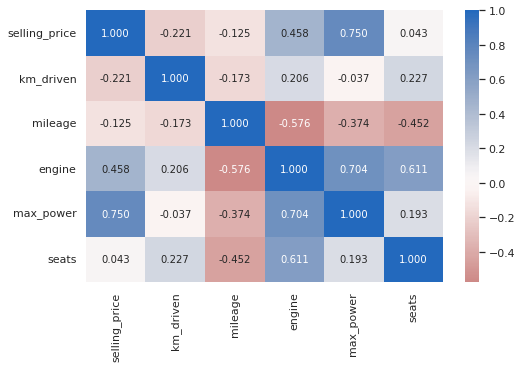

In [29]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(car_df[num_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)

Only max_power has a good correlation with price(selling price). 

Next, I'll be comparing price with other variables, both quantitative and categorical

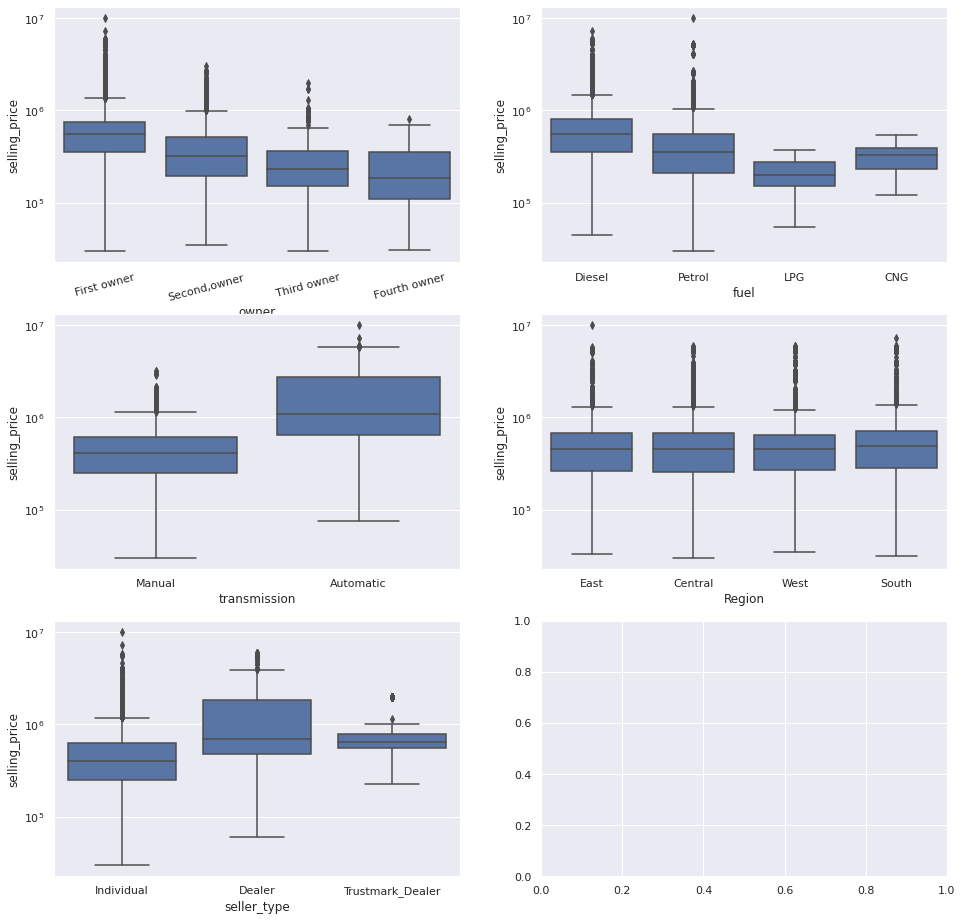

In [30]:
fig,axs = plt.subplots(3,2)
fig.set_figheight(16)
fig.set_figwidth(16)
axes = axs[0,0],axs[0,1],axs[1,0],axs[1,1],axs[2,0]
index = 0
for var in categorical_variables:
    g = sns.boxplot(x=var,y='selling_price',data=car_df,ax=axes[index],color=base_color)
    g.set_yscale('log')
    if var == 'owner':
        g.set_xticklabels(['First owner','Second,owner','Third owner','Fourth owner'],rotation=15)
    index +=1

The visualization produces some interesting insights. The median price reduces as the number of owners increase.Diesel cars cost more than Petrol cars. Automatic are cost more than manual cars.The individual median is lower compared to dealers and trustmard dealers,I guess the dealers are better negotiators. 
The median price is the same for all regions

We'll do the same for the max_power variable. This is because it has a high correlation with price.

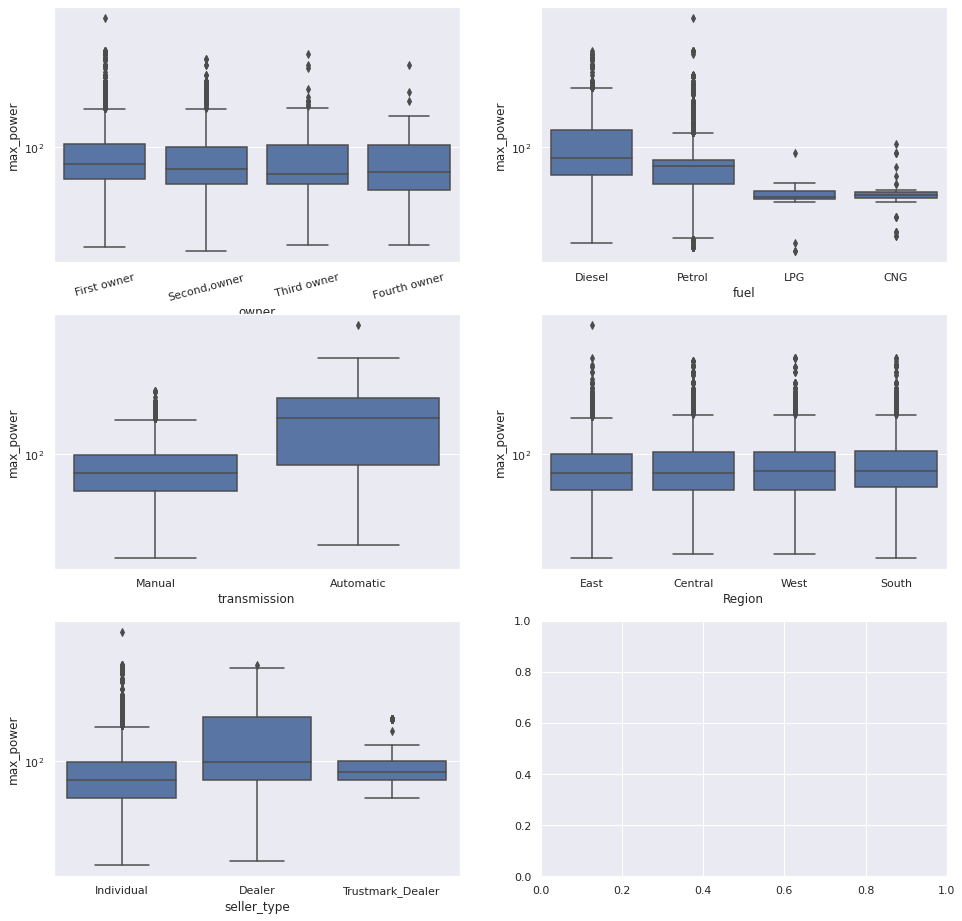

In [31]:
fig,axs = plt.subplots(3,2)
fig.set_figheight(16)
fig.set_figwidth(16)
axes = axs[0,0],axs[0,1],axs[1,0],axs[1,1],axs[2,0]
index = 0
for var in categorical_variables:
    g = sns.boxplot(x=var,y='max_power',data=car_df,ax=axes[index],color=base_color)
    g.set_yscale('log')
    if var == 'owner':
        g.set_xticklabels(['First owner','Second,owner','Third owner','Fourth owner'],rotation=15)
    index +=1

max_power seems farily regular among all categories except transmission,automatic cars have more max_power than manual cars

Next I'll futher investigate the relationship between max_power and price

<AxesSubplot:xlabel='selling_price', ylabel='max_power'>

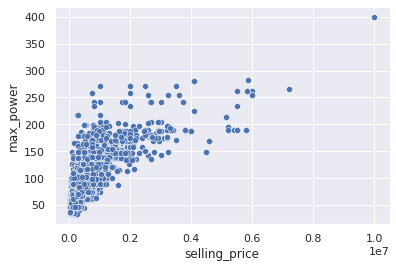

In [32]:
sns.scatterplot(x='selling_price',y='max_power',data=car_df)

(4.5, 6.75)

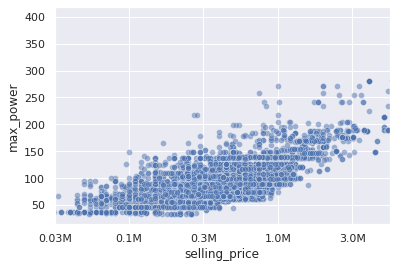

In [33]:
# let's apply log tranformation to the selling price
selling_price=log_trans(car_df.selling_price)
sns.scatterplot(x=selling_price,y=car_df.max_power,alpha=1/2,)
x_ticks = np.array([3.0,4.5,5.0,5.5,6.0,6.5,7.0])
ticks = [10000,30000,100000,300000,1000000,3000000,10000000]
labels = [str(t/1000000)+"M" for t in ticks]
plt.xticks(x_ticks,labels);
plt.xlim((4.5,6.75))

price increases gently as max_power increases. The change is more noticable after 0.3M(300,000),price rises more clearly with increase in max_power.

Let's compare the relationship between price and max_power along the following categorical variables owner and transmission

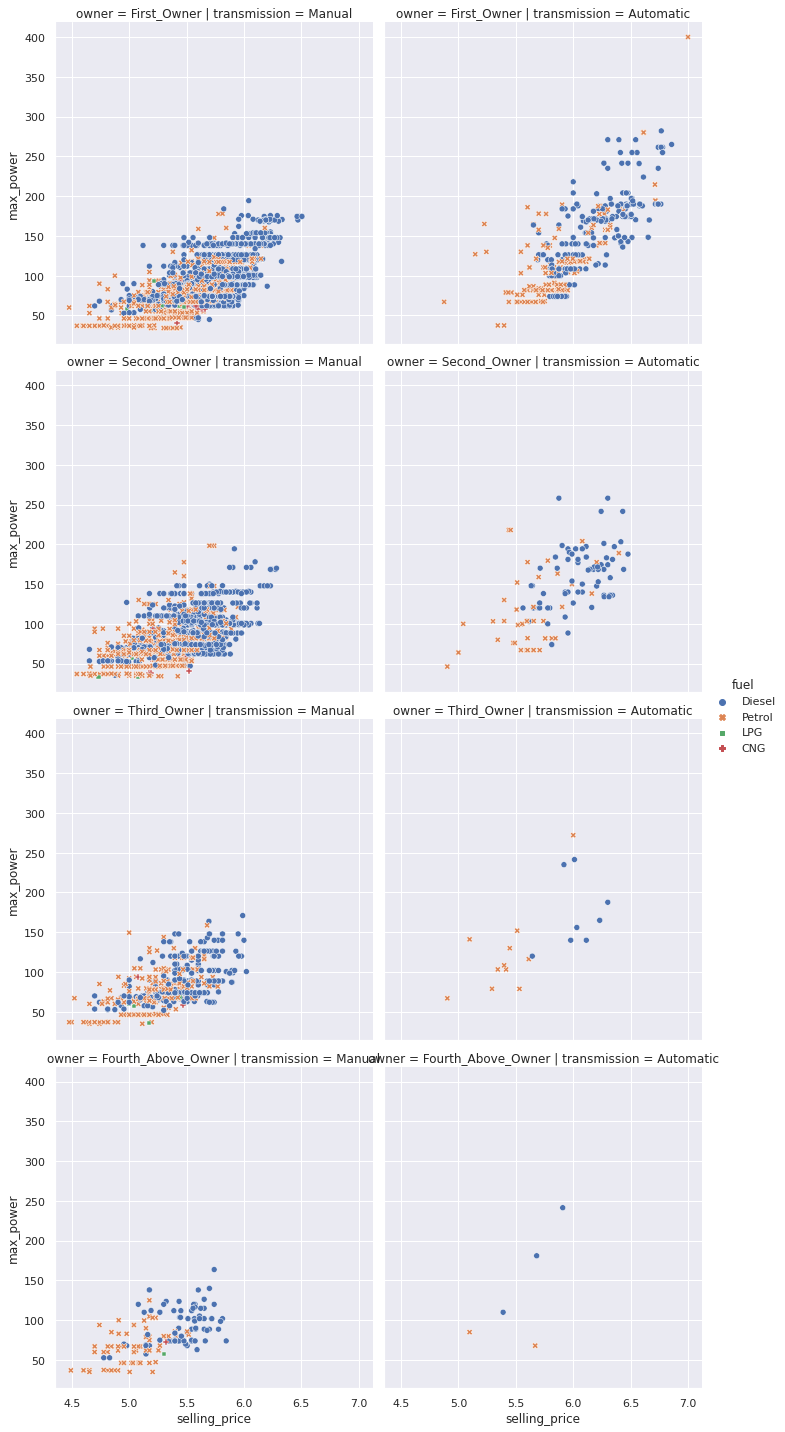

In [34]:
sns.relplot(x=selling_price,y=car_df.max_power,col=car_df.transmission,row=car_df.owner,hue=car_df.fuel,style=car_df.fuel)

From this plot I can observe a linear relationship between price ,max_power,fuel type,transmission and no of owners.As price increase they all change too; max_power increases and no of owners decreases also. Automatic and diesel cars costs more than manual and petrol cars

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

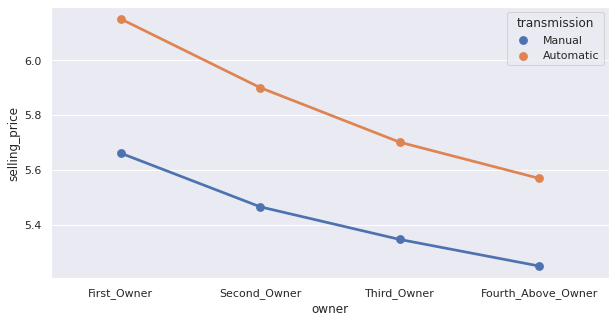

In [35]:
fig,axs = plt.subplots(ncols=1,figsize=[10,5])
sns.pointplot(y=selling_price,x=car_df['owner'],hue=car_df['transmission'],ax=axs,ci=None,estimator=lambda x:np.mean(x))

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
From this investigation, I discovered that the major predictors of price were the no of owners a car has had and the transmission of a car. The more owners a car has had, the lesser the price,also, automatic transmission cars have higher prices compared to manual transmission cars.

### Were there any interesting or surprising interactions between features?
It is worth noting that, non of the features of this dataset indicates whether a car will be sold or not. The purchase decision is independent of the variables provided in this dataset.

